# Projeto 1 -  Desenvolvimento de um modelo de diagnóstico de pacientes com Covid-19

In [1]:
#Importando as ferramentas para utilização do projeto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
#importando dados do arquivo csv

df = pd.read_csv('COVID.csv')
df

,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,499687,0,1,NaN,1.0,77,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,NaN
499688,499688,0,0,1.0,1.0,63,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0
499689,499689,1,1,NaN,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
499690,499690,1,1,NaN,0.0,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN


## 1. Preparação e limpeza dos dados

In [3]:
#Existe uma coluna coluna 'Unnamed' que parece uma duplicação do index. Ela será retirada da base de dados
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,0,1,NaN,1.0,77,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,NaN
499688,0,0,1.0,1.0,63,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0
499689,1,1,NaN,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
499690,1,1,NaN,0.0,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN


In [4]:
#Verificando se existem dados duplicados
df.duplicated().value_counts()

True     425264
False     74428
dtype: int64

Existe um valor alto de valores duplicados. Porém, como a maioria das features são binárias, é provável que sejam registros diferentes. 
Dito isso e visto que excluir os dados reduziria cerca de 85% das linhas, vamos manter os dados duplicados.

In [5]:
# Verificando os valores vazios (NaN)
df.isna().sum()

sex                         0
patient_type                0
intubed                392268
pneumonia                  11
age                         0
pregnancy              254434
diabetes                 1641
copd                     1446
asthma                   1442
inmsupr                  1662
hypertension             1489
other_disease            2193
cardiovascular           1509
obesity                  1470
renal_chronic            1476
tobacco                  1579
contact_other_covid    153675
covid_res                   0
icu                    392269
dtype: int64

Pode-se verificar pelos dados mostrados acima que existe um alto número de dados faltantes em relação a internações na UTI e dados intubados. Uma das explicações possíveis seria que os dados de pacientes não internados não são preenchidos para esses casos.
Vamos filtrar a tabela por pacientes dispensados para casa e os valores não preenchidos

In [6]:
# Vamos ver o número de pacientes dispensados e em seguida os valores NaN para a coluna 'icu' e 'intubed' para esse caso
dismissed = df[df['patient_type']==1]
dismissed

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
7,1,1,NaN,0.0,56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,NaN
8,1,1,NaN,0.0,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
11,1,1,NaN,0.0,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499686,1,1,NaN,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN
499687,0,1,NaN,1.0,77,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,NaN
499689,1,1,NaN,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
499690,1,1,NaN,0.0,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN


In [7]:
dismissed['icu'].isna().sum()

392146

In [8]:
dismissed['intubed'].isna().sum()

392146

Como o número de pacientes dispensados e o número de dados faltantes são exatamente iguais, vamos preencher esses dados como sendo valores zero nas colunas 'icu' e 'intubed'

In [9]:
df['intubed'] = np.where(df['patient_type']==1,0,df['intubed'])

In [10]:
df['icu'] = np.where(df['patient_type']==1,0,df['icu'])

In [11]:
df.isna().sum()

sex                         0
patient_type                0
intubed                   122
pneumonia                  11
age                         0
pregnancy              254434
diabetes                 1641
copd                     1446
asthma                   1442
inmsupr                  1662
hypertension             1489
other_disease            2193
cardiovascular           1509
obesity                  1470
renal_chronic            1476
tobacco                  1579
contact_other_covid    153675
covid_res                   0
icu                       123
dtype: int64

Verificamos acima também que agora existe um alto número de NaN para o dado gravidez. Possivelmente a explicação para isso é não preenchimento desse dado para o caso do sexo ser masculino. Verificaremos isso adiante.

In [12]:
male = df[df['sex']==0]
male

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,0.0,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,0,1,0.0,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
5,0,0,0.0,1.0,47,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,1.0
6,0,0,0.0,0.0,63,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499679,0,1,0.0,0.0,42,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0.0
499681,0,1,0.0,0.0,51,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
499683,0,1,0.0,0.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
499687,0,1,0.0,1.0,77,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0


In [13]:
male['pregnancy'].isna().sum()

253098

In [14]:
#Vamos preencher os dados de gravidez para homens como zero
df['pregnancy'] = np.where(df['sex']==0,0,df['pregnancy'])

In [15]:
df.isna().sum()

sex                         0
patient_type                0
intubed                   122
pneumonia                  11
age                         0
pregnancy                1336
diabetes                 1641
copd                     1446
asthma                   1442
inmsupr                  1662
hypertension             1489
other_disease            2193
cardiovascular           1509
obesity                  1470
renal_chronic            1476
tobacco                  1579
contact_other_covid    153675
covid_res                   0
icu                       123
dtype: int64

Ainda existem alguns valores faltantes na base de dados e destacando-se agora os dados faltantes sobre a possibilidade de o paciente ter tido algum contato com uma pessoa testada positiva. Não é possível encontrar uma explicação para a falta desses dados ser tão grande e nem para os demais.
Somando isso com o fato de que as maiorias das features são binárias, esses dados serão excluídos na tabela, pois não é possível determinar um valor para eles.

In [16]:
df = df.dropna(axis=0)

In [17]:
#Resetando os índices do dataframe para deixar na ordem crescente novamente
df = df.reset_index(drop=True)

In [18]:
df

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,1,1,0.0,0.0,56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0
2,1,1,0.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
3,1,1,0.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0
4,1,1,0.0,0.0,49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342599,1,1,0.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
342600,0,1,0.0,1.0,77,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0
342601,0,0,1.0,1.0,63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0
342602,1,1,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


## 2. Análise exploratória dos dados

In [19]:
#Vamos verificar as informações gerais antes de analisar os demais dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,342604.0,0.491454,0.499928,0.0,0.0,0.0,1.0,1.0
patient_type,342604.0,0.849158,0.357895,0.0,1.0,1.0,1.0,1.0
intubed,342604.0,0.020432,0.141472,0.0,0.0,0.0,0.0,1.0
pneumonia,342604.0,0.128344,0.334472,0.0,0.0,0.0,0.0,1.0
age,342604.0,41.433378,16.379029,0.0,30.0,40.0,52.0,120.0
pregnancy,342604.0,0.006988,0.083300,0.0,0.0,0.0,0.0,1.0
diabetes,342604.0,0.107167,0.309326,0.0,0.0,0.0,0.0,1.0
copd,342604.0,0.012685,0.111912,0.0,0.0,0.0,0.0,1.0
asthma,342604.0,0.030245,0.171261,0.0,0.0,0.0,0.0,1.0
inmsupr,342604.0,0.012913,0.112899,0.0,0.0,0.0,0.0,1.0


- Pela análise dados acima aparentemente pelo menos 75% dos pacientes foram enviados para casa.
- A idade máxima para o paciente é de 120 anos, o que é improvável, mas não impossível de ocorrer.
- Pode-se inferir que a quantidade de pacientes intubados ou internados em UTI é menor que 25%.
- De maneira geral, pacientes com comorbidades ou outras características analisadas também representam no máximo um quarto dos dados.
- Vamos verificar de maneira mais aprofundada nessas diferenças de análises

<AxesSubplot:title={'center':'Distribuição de idade dos pacientes analisados'}, xlabel='age', ylabel='Count'>

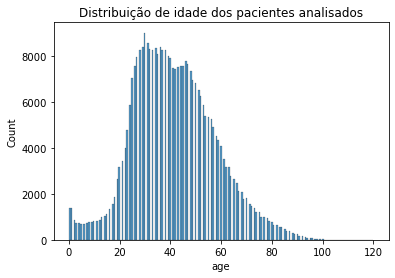

In [20]:
#Vamos verificar fazer um histograma dos dados do paciente
plt.title('Distribuição de idade dos pacientes analisados')
sns.histplot(df['age'])

- A faixa etária com mais caso está situada na faixa dos 30 anos

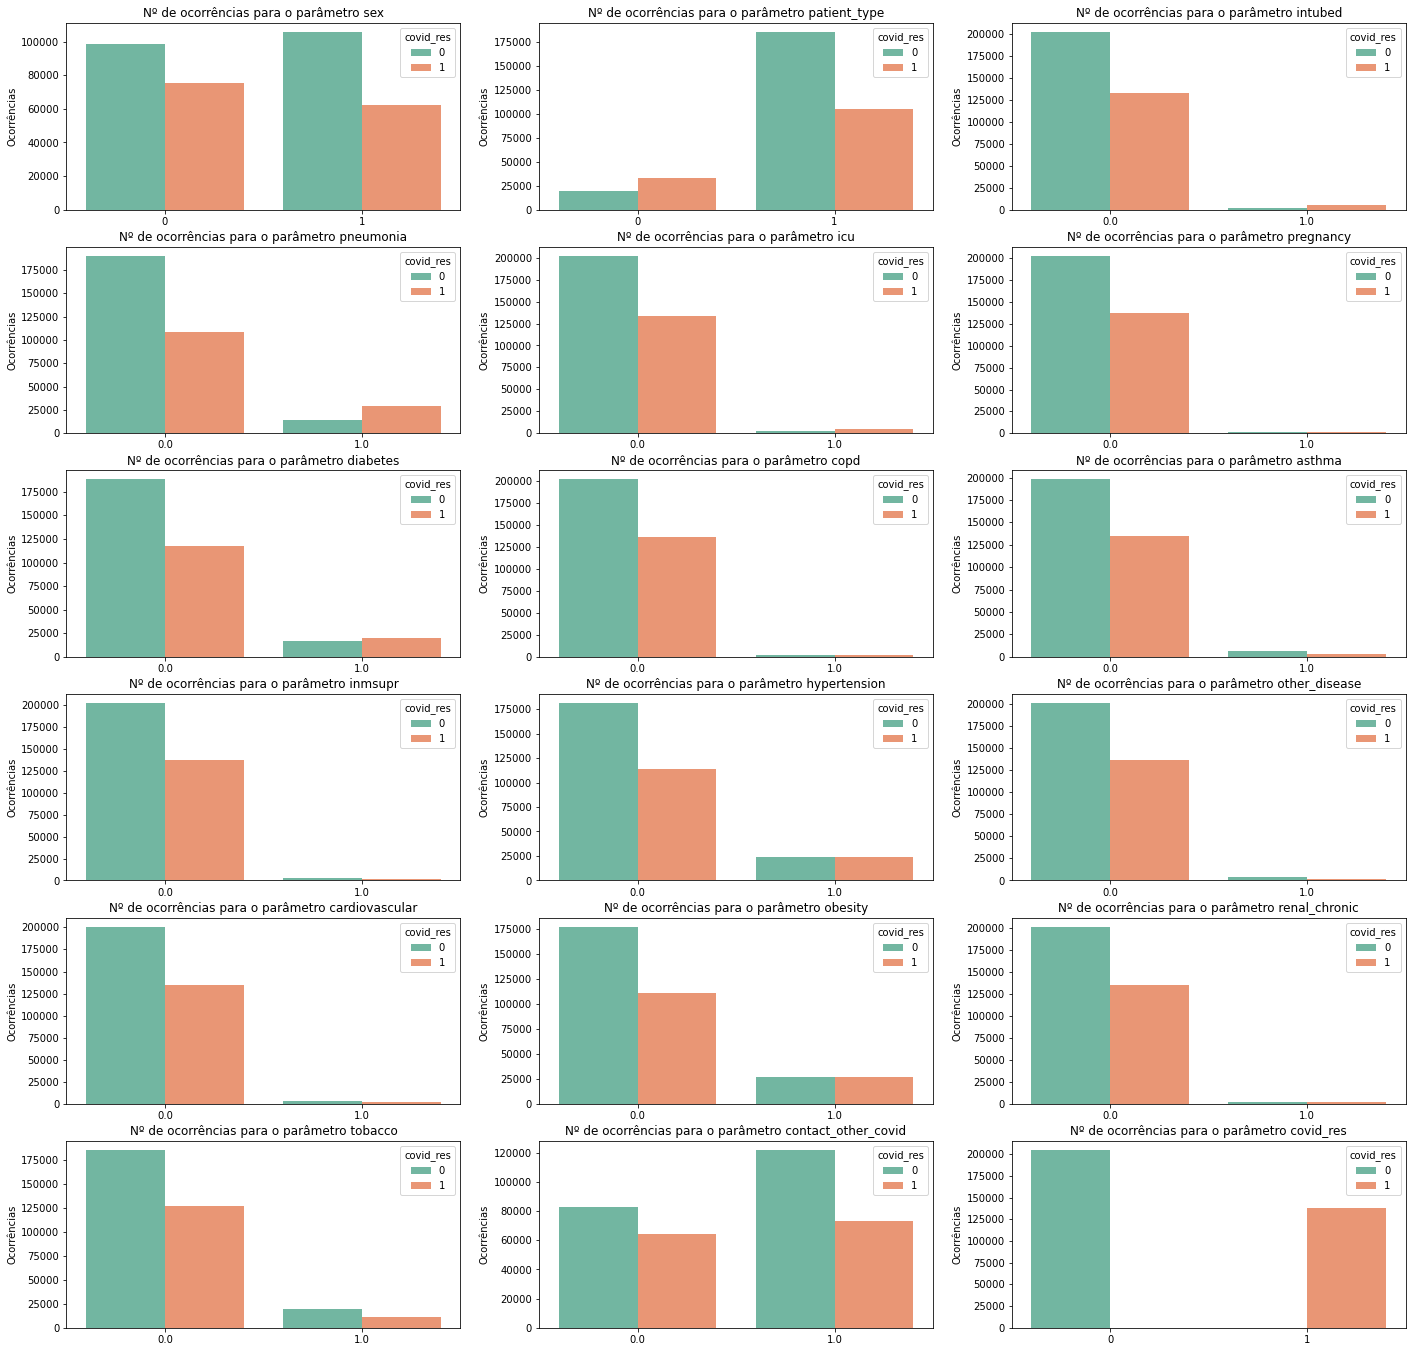

In [21]:
#Vamos fazer uma comparação de ocorrências nas demais features e aproveitar e fazer uma estratificação pelo resultado de covid
fig, axes = plt.subplots(6,3,figsize=(24,24))
axes = axes.ravel()

for ax, j in  zip(axes,df.columns):
    if j != 'age':
        sns.countplot(data=df,x=j, ax=ax, color = 'red', palette='Set2', hue= 'covid_res')
        ax.set_title(f'Nº de ocorrências para o parâmetro {j}')
        ax.set_xlabel('')
        ax.set_ylabel('Ocorrências')
    else:
        sns.countplot(data=df,x='icu', ax=ax, color = 'red', palette='Set2', hue= 'covid_res')
        ax.set_title(f'Nº de ocorrências para o parâmetro icu')
        ax.set_xlabel('')
        ax.set_ylabel('Ocorrências')

Pelos gráficos acima podemos verificar alguns pontos:
- Apesar da diferença grande entre o número de pacientes intubados e não intubados, a maior parte dos intubados testou positivo para covid;
- O mesmo raciocínio se aplica a pacientes na UTI;
- Entre as pessoas, cujo resultado do teste deu positivo, a maioria teve contato com outras pessoas com Covid;
- A maioria dos testados positivos são homens e a quantidade de homens testados positivos supera a de testados negativos
- Quando estratificamos pelo resultado do teste de covid, percebemos que sempre a ocorrência de resultados positivos é maior que a de negativos, com algumas exceções, pelo fato de todo o banco de dados estar desbalanceado para os resultados dos testes de COVID;
    - Dos pacientes que possuem pneumonia a maior parte testou positivo para Covid;
    - Dos pacientes que foram internados, a maioria confirmou a presença do vírus da Covid-19, mas uma parte que testou negativa também foi internada


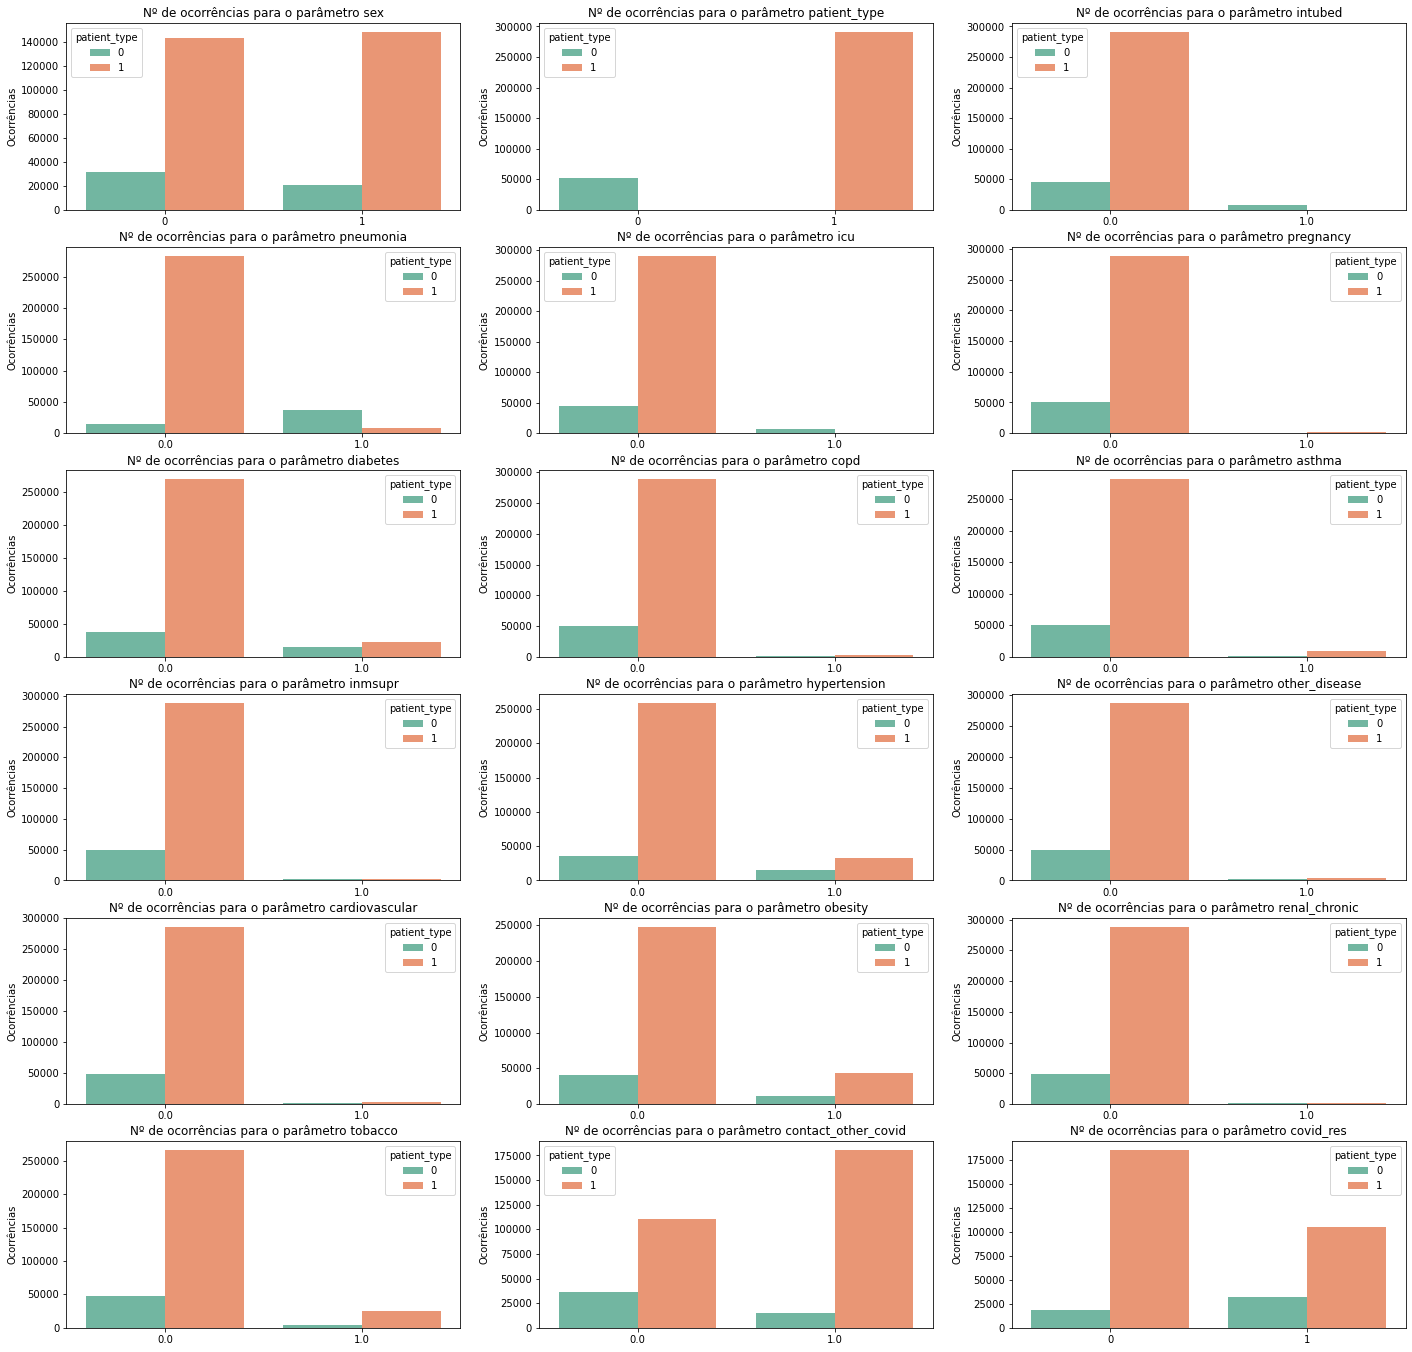

In [22]:
#Vamos aplicar o mesmo raciocínio mas estratificando pela quantidade de pacientes que foram liberados e verificar se existe alguma relação
fig, axes = plt.subplots(6,3,figsize=(24,24))
axes = axes.ravel()

for ax, j in  zip(axes,df.columns):
    if j != 'age':
        sns.countplot(data=df,x=j, ax=ax, color = 'red', palette='Set2', hue= 'patient_type')
        ax.set_title(f'Nº de ocorrências para o parâmetro {j}')
        ax.set_xlabel('')
        ax.set_ylabel('Ocorrências')
    else:
        sns.countplot(data=df,x='icu', ax=ax, color = 'red', palette='Set2', hue= 'patient_type')
        ax.set_title(f'Nº de ocorrências para o parâmetro icu')
        ax.set_xlabel('')
        ax.set_ylabel('Ocorrências')

Outras percepções:
- A maioria dos pacientes com pneumonia não foi liberada para voltar para casa;
- Embora o mesmo não se aplique para os diabéticos e hipertensos, a quantidade de pessoas internadas e liberadas ficou próxima. Enquanto que nas demais features a quantidade de pessoas liberadas já tiveram uma diferença significativa.


In [20]:
'''
Vamos filtrar por casos positivos e verificar se a dsitribuição de idade
'''

df_positivos = df[df['covid_res']==1]
df_positivos

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,1,1,0.0,0.0,56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0
2,1,1,0.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
3,1,1,0.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0
4,1,1,0.0,0.0,49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137948,0,1,0.0,0.0,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
137949,0,1,0.0,0.0,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
137950,1,1,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
137951,1,1,0.0,0.0,36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0


<AxesSubplot:title={'center':'Distribuição de idade dos pacientes testados positivos'}, xlabel='age', ylabel='Count'>

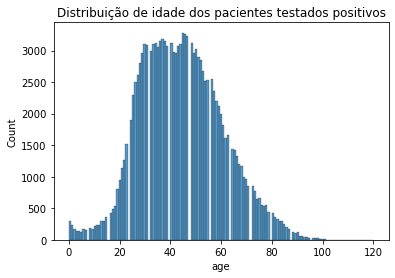

In [24]:
#Verificando a distribuição da idade para os testados positivos
plt.title('Distribuição de idade dos pacientes testados positivos')
sns.histplot(df_positivos['age'])

- Não foi possível ver uma alteração signigicativa na distribuição de idade dos pacientes testados postivos
- Isso também é de certa forma esperado, pois se pessoas jovens representam a maior parte de dados é provável que tenham as maiores ocorrências de testados positivos.

<AxesSubplot:title={'center':'Distribuição de idade dos pacientes internados na UTI'}, xlabel='age', ylabel='Count'>

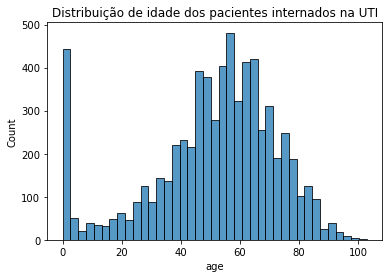

In [21]:
#Vamos agora verificar a distribuição de idade para aqueles pacientes intubados e também para aqueles que ficaram internados em CTI
df_icu = df[df['icu']==1]
plt.title('Distribuição de idade dos pacientes internados na UTI')
sns.histplot(df_icu['age'])

Considerações sobre o gráfico:
- A distribuição da idade para foi mais deslocada para direita, mostrando que os principais casos de pacientes internados em UTI estavam na faixa etária de 50 a 60 anos.
- Além dessa faixa, existe uma grande ocorrência de internações para faixa de 0 anos. Provavelmente recém-nascidos.

<AxesSubplot:title={'center':'Distribuição de idade dos pacientes entubados'}, xlabel='age', ylabel='Count'>

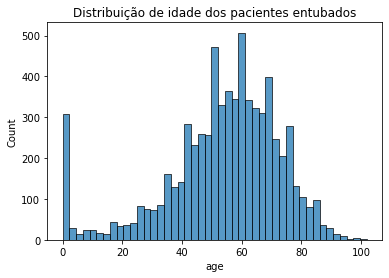

In [22]:
df_intubed = df[df['intubed']==1]
plt.title('Distribuição de idade dos pacientes entubados')
sns.histplot(df_intubed['age'])

Podemos verificar que o histograma ficou de certa forma semelhante ao anterior, incluindo as ocorrências de intubação para para recém-nascidos.
Esses histogramas afirmam que pessoas mais velhas e recém-nascidos, tendem a desenvolver sintomas mais graves das doenças. Pois apesar das representativadade dessas pessoas ser menor na base de dados inteira, elas tem maior ocorrência de serem internadas em unidades de tratamento intensivas e/ou entubadas

## 3. Modelagem de dados

Vamos agora fazer uma modelagem de dados para determinar para determinar se o resultado do exame de Covid nos pacientes:
Para isso utilizaremos os seguintes modelos:
- Random Forest
- XGBoost
- KNN

In [19]:
#Primeiramente vamos separar as features (x) da target (y)
x = df.drop(['covid_res'],axis=1)
y = df['covid_res']

In [21]:
#Separando os dados em treino e teste. Utilizaremos 30% dos dados para treino. Vamos manter um random_state para garantir a reprodutibilidade dos casos
#Vamos usar a estratificaçõa, pois há maior ocorrências de casos testados negativos para Covid
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

### 3.1. Modelo Random Forest

In [22]:
#Obtendo a ferramenta para avaliação das métricas
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [23]:
#Aplicando o modelo random forest para classificação de dados, com o máximo de 100 árvores e utilização do critério Gini para medir as impurezas
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(
    n_estimators=100,  
    criterion='gini',
    max_depth=None,  
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,  
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,  
)
#Determinando o modelo à partir dos dados x e y de treino
model_RFC.fit(x_train, y_train)

#Predição de dados à partir dos modelos criados
y_pred_RFC = model_RFC.predict(x_test)

#Avaliação do modelo
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.64      0.88      0.75     61396
           1       0.61      0.27      0.38     41386

    accuracy                           0.64    102782
   macro avg       0.63      0.58      0.56    102782
weighted avg       0.63      0.64      0.60    102782



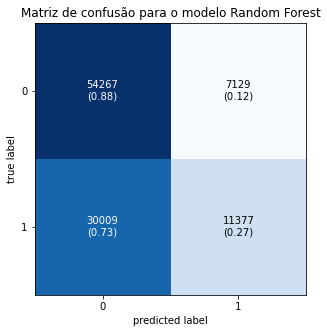

In [24]:
#Vamos verificar a matriza de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_RFC)

plot_confusion_matrix(conf_mat=cm,show_normed=True,figsize=(5,5))
plt.title("Matriz de confusão para o modelo Random Forest")
plt.show()

O Modelo Random Forest nos trouxe valores altos de recall para casos negativos e valores muito baixos para resultados positivos, mostrando que o modelo tem dificuldade em determinar resultados positivos. A acurácia de 64%.
Enquanto que a precisão para ambos os resultados está em torno

### 3.2. Modelo XGBoost

In [25]:
#Definindo um modelo XGBoost e suas métricas de avaliação
from xgboost import XGBClassifier

In [26]:
#Definindo um modelo XGBoost e suas métricas de avaliação

model_XGB = XGBClassifier(random_state = 42) #Manter a reprodutibilidade dos dados
model_XGB.fit(x_train, y_train)

y_pred_XGB = model_XGB.predict(x_test)

print(classification_report(y_test, y_pred_XGB))

[14:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.65      0.91      0.76     61396
           1       0.67      0.26      0.38     41386

    accuracy                           0.65    102782
   macro avg       0.66      0.59      0.57    102782
weighted avg       0.66      0.65      0.61    102782



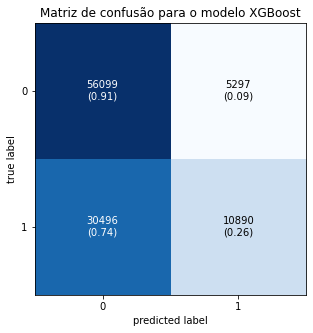

In [27]:
#Plotando a matriz de confusão do modelo XGBoost
cm = confusion_matrix(y_test, y_pred_XGB)

plot_confusion_matrix(conf_mat=cm,show_normed=True,figsize=(5,5))
plt.title("Matriz de confusão para o modelo XGBoost")
plt.show()

Comparando-se as metas em relação ao modelo anterior, vemos uma variação muito tímida. O recall para valores positivos permanece baixo.

### 3.3. Modelo KNN

In [28]:
#Montando um modelo KNN
#Normalizando os dados de X para criação do modelo
from sklearn.preprocessing import StandardScaler 

std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

In [29]:
#Importando a ferramenta
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#Instanciando o modelo e fazendo o fit dos dados

model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train_std, y_train)

y_pred_KNN = model_KNN.predict(x_test_std)

print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67     61396
           1       0.49      0.42      0.45     41386

    accuracy                           0.59    102782
   macro avg       0.56      0.56      0.56    102782
weighted avg       0.58      0.59      0.58    102782



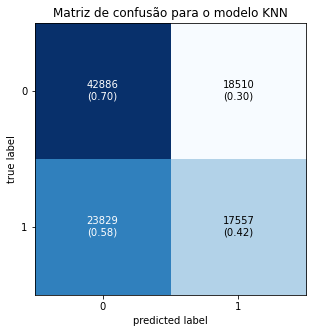

In [31]:
#Plotando a matriz de confusão do modelo KNN
cm = confusion_matrix(y_test, y_pred_KNN)

plot_confusion_matrix(conf_mat=cm,show_normed=True,figsize=(5,5))
plt.title("Matriz de confusão para o modelo KNN")
plt.show()

O modelo KNN apresentou algumas diferenças nas suas métricas em relação aos anteriores. O recall para valores negativos de Covid ficou abaixo dos modelos anteriores, mas por outro lado o recall para valores positivos aumentou. 
A acurácia do modelo se apresentou ligeiramente menor.
Também notou-se uma necessidade maior de poder computacional em relação aos modelos anteriores.

### 3.4. Comparação das métricas

In [32]:
#Vamos fazer agora uma compração das métricas dos modelos e também incluir métricas AUC-ROC
from sklearn import metrics

#Criando a lista com os modelos instaciados e valores preditos por eles
lista = ['Random Forest', 'XGBoost', 'KNN']
list_models = [model_RFC,model_XGB, model_KNN]
list_y = [y_pred_RFC,y_pred_XGB,y_pred_KNN]

#loop para 
for i, j, k in zip(lista,list_models,list_y):
    print(i)
    accuracy = metrics.accuracy_score(y_test, k)
    auc = metrics.roc_auc_score(y_test, j.predict(x_test))
    precision = metrics.precision_score(y_test, k, average='weighted')
    recall = metrics.recall_score(y_test, k, average='weighted')
    f1_score = metrics.f1_score(y_test, k, average='weighted')
    print("Acurácia:", f'{accuracy:.2f}')
    print("AUC-ROC:", f'{auc:.2f}')
    print("Precisão:", f'{precision:.2f}')
    print("Recall:", f'{recall:.2f}')
    print("F1-Score:", f'{f1_score:.2f}')
    print("----------------------")

Random Forest
Acurácia: 0.64
AUC-ROC: 0.58
Precisão: 0.63
Recall: 0.64
F1-Score: 0.60
----------------------
XGBoost
Acurácia: 0.65
AUC-ROC: 0.59
Precisão: 0.66
Recall: 0.65
F1-Score: 0.61
----------------------
KNN
Acurácia: 0.59
AUC-ROC: 0.50
Precisão: 0.58
Recall: 0.59
F1-Score: 0.58
----------------------


Pelas métricas avaliadas acima iremos utilizar o modelo XGBoost, pois apresentou métricas superiores aos demais modelos e também não apresentou a maior demanda computacional.

## 4. Otimização do modelo XGBoost

In [37]:
#Os parâmetros abaixo foram testados, mas após 40 minutos o modelo não conseguiu ser otimizado. Por isso os parâmetros vão ser alterados
n_estimators = [200,350,500]
max_depth = [10,20,30]
min_samples_split = [2, 4, 8]
min_samples_leaf = [2, 4, 8]
num_parallel_tree = [2, 4, 8]

parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'num_parallel_tree': num_parallel_tree
}


In [41]:
#Alterando os parâmetros
n_estimators = [200,350,500]
max_depth = [10,20,30]
min_samples_split = [2, 4, 8]
min_samples_leaf = [1, 2, 3]
num_parallel_tree = [1, 2, 3]

parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'num_parallel_tree': num_parallel_tree

}


In [42]:
#Vamos utilizar o modelo Random Search que possui um computacional menor, visto que existe uma quantidade significativa de dados
from sklearn.model_selection import RandomizedSearchCV

In [44]:
#Estimando os parâmetros do Random Search
random_search = RandomizedSearchCV(
    estimator=model_XGB,
    param_distributions=parameters,
    n_iter=81,
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [47]:
#Realizando o fit de dados

random_search.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 

Após duas tentativas o modelo não foi otimizado passaremos então a utilizar o Cross Validation 

In [27]:
#Importando a ferramenta cross validation
from sklearn.model_selection import cross_val_score, cross_validate

In [32]:
#Criando uma lista com as métrocas de avaliação
metrics_index = ['accuracy', 'recall', 'precision', 'f1']

#Vamos verificar os métricas para os diferentes modelos validados criados. Vamos também dividir a base de dados em 5 seções
results = cross_validate(model_XGB, x_train_std, y_train, scoring=metrics_index, cv=5)
print(results)

[15:53:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [57]:
#Vamos representar as métricas do cross-validation em um DataFrame para melhor visualização
indices = [str(i)+'ª base' for i in range(1,6)]
df_results = pd.DataFrame(index=indices, data=results)
df_results= df_results.drop(['fit_time','score_time'],axis=1)
df_results

,test_accuracy,test_recall,test_precision,test_f1
1ª base,0.649661,0.265559,0.661977,0.379056
2ª base,0.653560,0.275034,0.670115,0.390000
3ª base,0.649633,0.266246,0.661265,0.379637
4ª base,0.652156,0.275410,0.664128,0.389357
5ª base,0.650926,0.269870,0.663611,0.383701


Comparando-se os valores vemos que as métricas ficaram bem parecidas, mostrando uma boa generalização do modelo

### 4.1. Rebalanceando os dados

Foi visto na análise exploratória de dados que a quantidade de dados relacionados à casos positivos é menor em relação aos negativos. Com isso, vamos buscar rebalancear os dados para buscar melhorar o modelo

In [58]:
#Vamos utilizar o OverSamplig, UnderSampling e o SMOTE para verificar quais modelos irão otimizar o modelos
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [132]:
#Iniciando pelo OverSample

oversample = RandomOverSampler(sampling_strategy='minority',random_state=42)
x_train_ov, y_train_ov = oversample.fit_resample(x_train, y_train)

In [133]:
#Instaciando o modelo
model_XGB_ov = XGBClassifier(random_state = 42)
model_XGB_ov.fit(x_train_ov, y_train_ov)

[20:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
#Predizendo valores de target para o novo modelo
y_pred_ov = model_XGB_ov.predict(x_test)

In [135]:
#Vamos verificar as métricas para o novo modelo
print(classification_report(y_test, y_pred_ov))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71     61396
           1       0.55      0.45      0.50     41386

    accuracy                           0.63    102782
   macro avg       0.61      0.60      0.60    102782
weighted avg       0.62      0.63      0.62    102782



In [136]:
#Fazendo pelo OverSample
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=42)
x_train_un, y_train_un = undersample.fit_resample(x_train, y_train)

In [137]:
#Instaciando o modelo
model_XGB_un = XGBClassifier(random_state = 42)
model_XGB_un.fit(x_train_un, y_train_un)

[20:42:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
#Predizendo valores de target para o novo modelo
y_pred_un = model_XGB_un.predict(x_test)

In [139]:
#Vamos verificar as métricas para o novo modelo
print(classification_report(y_test, y_pred_un))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71     61396
           1       0.55      0.45      0.50     41386

    accuracy                           0.63    102782
   macro avg       0.61      0.60      0.60    102782
weighted avg       0.62      0.63      0.62    102782



Houveram poucas mudanças entre os modelos de Under e OverSampling.

In [112]:
#Aplicando-se agora a técnica SMOTE
smote = SMOTE(random_state=42)

x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

In [156]:
#Criando o modelo a partir dos dados sintéticos
model_XGB_sm = XGBClassifier(random_state = 42)
model_XGB_sm.fit(x_train_sm, y_train_sm)

[20:50:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
#Gerando valores à partir do novo modelo criado
y_pred_sm = model_XGB_sm.predict(x_test)

In [158]:
#Métricas para o novo modelo
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71     61396
           1       0.55      0.44      0.49     41386

    accuracy                           0.63    102782
   macro avg       0.61      0.60      0.60    102782
weighted avg       0.62      0.63      0.62    102782



In [161]:
#Criando a lista com os modelos instaciados e valores preditos por eles
lista = ['Sem tratamento','Over-sampling', 'Under-Sampling', 'SMOTE']
list_models = [model_XGB, model_XGB_ov, model_XGB_un, model_XGB_sm]
list_y = [y_pred_XGB, y_pred_ov, y_pred_un, y_pred_sm]

#loop para 
for i, j, k in zip(lista,list_models,list_y):
    print(i)
    accuracy = metrics.accuracy_score(y_test, k)
    auc = metrics.roc_auc_score(y_test, j.predict(x_test))
    precision = metrics.precision_score(y_test, k, average='weighted')
    recall = metrics.recall_score(y_test, k, average='weighted')
    f1_score = metrics.f1_score(y_test, k, average='weighted')
    print("Acurácia:", f'{accuracy:.2f}')
    print("AUC-ROC:", f'{auc:.2f}')
    print("Precisão:", f'{precision:.2f}')
    print("Recall:", f'{recall:.2f}')
    print("F1-Score:", f'{f1_score:.2f}')
    print("----------------------")

Sem tratamento
Acurácia: 0.65
AUC-ROC: 0.59
Precisão: 0.66
Recall: 0.65
F1-Score: 0.61
----------------------
Over-sampling
Acurácia: 0.63
AUC-ROC: 0.60
Precisão: 0.62
Recall: 0.63
F1-Score: 0.62
----------------------
Under-Sampling
Acurácia: 0.63
AUC-ROC: 0.60
Precisão: 0.62
Recall: 0.63
F1-Score: 0.62
----------------------
SMOTE
Acurácia: 0.63
AUC-ROC: 0.60
Precisão: 0.62
Recall: 0.63
F1-Score: 0.62
----------------------


Os métodos de Over Sampling e Under Sampling tiveram exatamente o mesmo efeito, isto é, tiveram os mesmo valores de Precisão, Recall e Acurácia tanto para targets positivos e negativos. 

Após a criação de dados sintéticos pelo SMOTE, as métricas médias ponderadas também tiveram os mesmos valores, embora as métricas por target tenham apresentado alguma diferença.

Porém, os dados de recall para valores positivos que estavam de certa forma mais baixos, melhoraram após o rebalanceamento, em detrimento da mesma métrica para valores negativos. Deixando as métricas com valores mais próximos.

Por último, as técnicas de rebalanceamento dos dados geraram uma redução de praticamente todas métricas de avaliação com exceção da curva.

## 5. Conclusão

- Pelas análise dos dados fornecido, vimos inicialmente bastante dados faltantes, mas que após uma avaliação dos demais dados pode-se inferir quais eram os valores reais. Isso mostra a importância de se ter algum conhecimento sobre o assunto para realizar a análise dos dados.
- Ainda assim foi necessário ainda retirar uma boa parte dos dados, que estavam com valores não preenchidos, pois não pode se obter fazer uma inferência sobre eles.
- A maior parte dos dados foram sobre pacientes de 20 a 40 anos, mas os dados de pacientes internados em UTI e entubados mostram que a maioria estava em torno de 60 anos, mostrando que pessoas mais idosas apresentam sintomas mais graves.
- O target da base de dados apresentou-se uma maior quantidade de resultados negativos em relação aos positivos,  
- Foram testados 3 modelos de predição dos casos e foi escolhido o modelo XGBoost para otimização (apresentou as maiores métricas de avaliação) ao invés do Random Forest e o KNN. Este último, também apresentou uma maior demora para criação do modelo em relação aos demais.
- Buscou-se otimizar o modelo pelo método Random Search, mas devido à elevada demanda por desempenho computacional essa ferramenta foi abandonada.
- Foi feito então um cross-validation divindo-se os dados em 5 partes diferentes. Todos apresentaram métricas com valores próximos, o que mostrou uma boa generalização do modelo.
- Também buscou-se utilizar métodos de rebalanceamento de dados para buscar aprimorar o modelo, mas sem nenhum resultado nos dados médios ponderados e acurácia. Embora a diferença dos valores de recall para casos positivos e negativos tenha reduzido, por estarem mais balanceados.
- Os valores da curva ROC_AUC próximos a 0,5 dos modelos obtidos, demonstram uma certa dificuldade do modelo em separar as classes.